# Random Number Generator

In [141]:
import math
x0 = 1000
a = 24693
c = 3517
K = math.pow(2, 17)

def lcong_randnum(i, num=x0):
    if i == 0: return num / K
    return lcong_randnum(i - 1, ((num * 24693) + 3517) % K)

In [142]:
u = 0
def rand_num():
    global u
    u += 1
    return lcong_randnum(u, 1000)

In [144]:
rand_num()

0.0425262451171875

## Exponential random var

In [145]:
def exponential_random(mean=12):
    return - mean * (math.log(1 - rand_num()))

In [146]:
x = []
for i in range(1000):
    x.append(exponential_random())

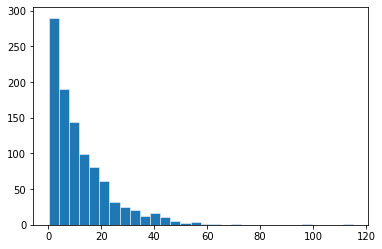

In [148]:
import matplotlib.pyplot as plt
fix, ax = plt.subplots()
ax.hist(x, bins=30, linewidth=0.5, edgecolor="white")
plt.show()

In [214]:
def run_simulation(cumulative_time=0, try_num=1, verbose=False):
    if verbose: print(f"Try #{try_num}: ", end="")
    cumulative_time += 6 # Turn on the phone and dial the customer
    random_var = rand_num()
    if random_var <= 0.2: 
        if verbose: print("Line was busy")
        cumulative_time += 3 + 1 # Line was busy, end the call
    elif random_var <= 0.5:
        if verbose: print("Customer unavailable")
        cumulative_time += 25 + 1 # Customer was unavailable, end the call
    else:
        customer_duration = exponential_random()
        if customer_duration <= 25:
            if verbose: print(f"Customer picked up in {customer_duration:.2f}s")
            cumulative_time += customer_duration + 1 # Cusomter picks up, end the call
            return cumulative_time
        else:
            if verbose: print("Customer did not pick up in time")
            cumulative_time += 25 + 1 # Customer did not pick up in time
    
    if try_num <= 4:
        return run_simulation(cumulative_time, try_num + 1, verbose) # Try again if less than 4 attempts
    else:
        if verbose: print("Gave up")
        return cumulative_time # Give up

In [223]:
run_simulation(0, 1, True)

Try #1: Customer did not pick up in time
Try #2: Customer unavailable
Try #3: Customer unavailable
Try #4: Customer unavailable
Try #5: Customer picked up in 17.15s


152.15147132963895